# FULL DATA / NEW DATA

In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statistics

import scipy.stats as stats
from collections import Counter
from scipy.stats import f_oneway, pearsonr, spearmanr, kruskal, ttest_1samp, ttest_rel, levene, skew, friedmanchisquare
from scikit_posthocs import posthoc_conover

from statsmodels.stats.stattools import durbin_watson
from statsmodels.multivariate.manova import MANOVA
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Average Group Data

In [79]:
# List to store the GSR data from each CSV file
gsr_data = []

# Read in the data from each CSV file and store the GSR data in the list
for i in range(4, 7):
    df = pd.read_csv(f"./Normally/gsrdata_{i}.csv")
    gsr_data.append(df["Raw_GSR"])

# Calculate the average GSR value
average_gsr = sum(gsr_data) / len(gsr_data)

In [80]:
average_gsr.dropna()

0      -0.006620
1       0.659388
2       0.674125
3       0.677137
4       0.695318
          ...   
3521   -0.204519
3522    0.848763
3523   -0.195056
3524   -0.212479
3525   -0.214414
Name: Raw_GSR, Length: 3526, dtype: float64

In [81]:
# Write the average GSR data to a new CSV file
average_df = pd.DataFrame({"GSR": average_gsr})
average_df.to_csv("average_gsr_group2_new.csv", index=True)

# Mean, variance and standard deviation of the GSR Benchmark
The Benchmark aims to make the upcoming data comparable

In [11]:
data0 = pd.read_csv('average_gsr_benchnew.csv')

In [12]:
mean = data0["GSR"].mean()
variance = data0["GSR"].var()
std = data0["GSR"].std()

In [13]:
print("Benchmark Stats: ",'\n')
print("Mean: ", mean)
print("Variance: ", variance)
print("Standard deviation: ", std)

Benchmark Stats:  

Mean:  0.2866412408583815
Variance:  0.01835561380152363
Standard deviation:  0.13548289117642726


Old Benchmark Stats:  

Mean:  0.22582085031204685

Variance:  0.04513382584624771

Standard deviation:  0.2124472307332993

# Group: calculate the variance, mean & std of the GSR data, conduct t-test 
We work with the group data files, whose mean were calculated prior to this. By doing so, we make it possible to COMPARE GROUPS to each other. Afterwards, we will be working with each individual file and first get the individual variance and then conclude the mean. By Doing so, we make differences WITHIN A GROUP visible.

In [2]:
groupstats_df = pd.DataFrame(columns=['Group', 'Variance', 'Mean', 'Standard_Deviation'])

In [4]:
#calculate the variance of each file per group
for i in range(1, 12):
    df = pd.read_csv(f'average_gsr_group{i}.csv')
    gsr_variance = df['GSR'].var()
#    print(f'The variance of the mean GSR data of group {i} is: {gsr_variance}')

In [771]:
groupstats_df = pd.DataFrame(columns=['Group', 'Variance', 'Mean', 'Standard_Deviation'])

for i in range(1,12):
    df = pd.read_csv(f'average_gsr_group{i}.csv')
    #variance, mean and standard deviation
    gsr_variance = df['GSR'].var()
    gsr_mean = df['GSR'].mean()
    gsr_std = df['GSR'].std()
    groupstats_df = groupstats_df.append({'Group': i, 'Variance': gsr_variance, 'Mean': gsr_mean, 'Standard_Deviation': gsr_std}, ignore_index=True)
    
print(groupstats_df)

    Group  Variance      Mean  Standard_Deviation
0     1.0  0.255843 -0.301450            0.505810
1     2.0  0.322374  0.386465            0.567780
2     3.0  0.336371 -0.001206            0.579975
3     4.0  0.322228  0.025738            0.567652
4     5.0  0.258458 -0.086729            0.508388
5     6.0  0.201505  0.317646            0.448893
6     7.0  0.140642  0.494338            0.375022
7     8.0  0.289823  0.229220            0.538352
8     9.0  0.254204 -0.007934            0.504187
9    10.0  0.084315  0.657878            0.290370
10   11.0  0.237499  0.232470            0.487339


Note: Variance can be smaller than STD, when the scale is 0 to 1.

Variance: Variance measures the spread of the data: how far each value in the data set is from the mean. A higher variance indicates that the data points are more diverse and deviate more from the mean. Identify differencesamong groups, and to compare the spread of data between groups.

Standard deviation: Standard deviation is average deviation of each data point from the mean. A higher standard deviation indicates that the data points are more diverse. Compare the spread of data within groups.

In [772]:
#is the data normally distributed? no, its not.
group1 = pd.read_csv('average_gsr_group1.csv').dropna()[['GSR']].values.flatten()
group2 = pd.read_csv('average_gsr_group2.csv').dropna()[['GSR']].values.flatten()
group3 = pd.read_csv('average_gsr_group3.csv').dropna()[['GSR']].values.flatten()
group4 = pd.read_csv('average_gsr_group4.csv').dropna()[['GSR']].values.flatten()
group5 = pd.read_csv('average_gsr_group5.csv').dropna()[['GSR']].values.flatten()
group6 = pd.read_csv('average_gsr_group6.csv').dropna()[['GSR']].values.flatten()
group7 = pd.read_csv('average_gsr_group7.csv').dropna()[['GSR']].values.flatten()
group8 = pd.read_csv('average_gsr_group8.csv').dropna()[['GSR']].values.flatten()
#group9 = pd.read_csv('average_gsr_group9.csv').dropna()[['GSR']].values.flatten()
group10 = pd.read_csv('average_gsr_group10.csv').dropna()[['GSR']].values.flatten()
group11 = pd.read_csv('average_gsr_group11.csv').dropna()[['GSR']].values.flatten()

all_data = np.concatenate([group1, group2, group3, group4, group5, group6, group7, group8, group9])

stats.shapiro(all_data)

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9888039231300354, pvalue=0.0)

In [773]:
# comparing the variances of the groups with levene test, they are significantly different from each other 
levene_test = levene(group1,group2,group3,group4,group5,group6,group7,group8,group10,group11)
print(levene_test)

LeveneResult(statistic=345.8979595053021, pvalue=0.0)


In [776]:
#to find out which groups differ how from each other, we conclude a post-hoc test
datacono = [group1, group2, group3, group4, group5, group6, group7, group8, group10, group11]
result = posthoc_conover(datacono)
#result

In [775]:
#sample t test to determine significant differences in means
t, p = stats.ttest_1samp(groupstats_df['Mean'], 0)
print("t-Statistic: ", t)
print("p-Value: ", p)

t-Statistic:  2.089699754506084
p-Value:  0.06316088265867909


In [787]:
groupstats_df.drop([8], axis=0)

,Group,Variance,Mean,Standard_Deviation
0,1.0,0.255843,-0.301450,0.505810
1,2.0,0.322374,0.386465,0.567780
2,3.0,0.336371,-0.001206,0.579975
3,4.0,0.322228,0.025738,0.567652
4,5.0,0.258458,-0.086729,0.508388
5,6.0,0.201505,0.317646,0.448893
6,7.0,0.140642,0.494338,0.375022
7,8.0,0.289823,0.229220,0.538352
9,10.0,0.084315,0.657878,0.290370
10,11.0,0.237499,0.232470,0.487339


In [788]:
#percentile of std: what is high what is low
x = np.percentile([0.505810, 0.567780, 0.579975, 0.567652, 0.508388,  0.448893,  0.375022, 0.538352, 0.290370, 0.487339], [25, 50, 75])
x*100
x

array([0.4585045, 0.507099 , 0.560327 ])

In [789]:
#percentile of variance: what is high what is low
x = np.percentile([0.255843, 0.322374, 0.336371, 0.322228, 0.258458,  0.201505,  0.140642, 0.289823, 0.084315, 0.237499], [25, 50, 75])
x*100
x

array([0.2105035 , 0.2571505 , 0.31412675])

# Indv: calculate the variance, mean & std of the GSR data


In [791]:
#groupstats_df.to_csv('group_stats.csv', index=False)

In [836]:
indistats_df = pd.DataFrame(columns=['ID', 'Variance', 'Mean', 'Standard_Deviation'])

for i in range(0,30):
    # read the CSV file
    df = pd.read_csv(f'./Normal/gsrdata_{i}.csv')
    # calculate the variance of the 'gsr' column
    gsr_variance = df['Raw_GSR'].var()
    # calculate the mean of the 'gsr' column
    gsr_mean = df['Raw_GSR'].mean()
    # calculate the std of the 'gsr' column
    gsr_std = df['Raw_GSR'].std()
    indistats_df = indistats_df.append({'ID': i, 'Variance': gsr_variance, 'Mean': gsr_mean, 'Standard_Deviation': gsr_std}, ignore_index=True)
    
print(indistats_df)

      ID  Variance          Mean  Standard_Deviation
0    0.0  1.000307  2.908837e-14            1.000154
1    1.0  1.000135  9.530979e-15            1.000068
2    2.0  1.000134 -1.365823e-14            1.000067
3    3.0  1.000166 -1.796355e-16            1.000083
4    4.0  1.000162  8.238240e-16            1.000081
5    5.0  1.000284  7.803048e-16            1.000142
6    6.0  1.000297  9.753891e-16            1.000148
7    7.0  1.000282 -5.744336e-14            1.000141
8    8.0  1.000296 -3.582723e-16            1.000148
9    9.0  1.000182  5.353365e-16            1.000091
10  10.0  1.000180  2.237225e-17            1.000090
11  11.0  1.000175  1.533957e-15            1.000087
12  12.0  1.000163 -4.386013e-16            1.000081
13  13.0  1.000160  8.091125e-17            1.000080
14  14.0  1.000167  5.274715e-16            1.000083
15  15.0  1.000174  1.395004e-15            1.000087
16  16.0  1.000134 -1.579515e-14            1.000067
17  17.0  1.000074  4.343620e-15            1.

In [845]:
#indistats_df.to_csv('indi_stats.csv', index=False)

In [844]:
stats.shapiro(indistats_df['Variance'])

ShapiroResult(statistic=0.9323909282684326, pvalue=0.05685275048017502)

# Creating the Dataframe Performance x GSR

In [795]:
#load data from CSV files
gsr_data = pd.read_csv('group_stats.csv')
performance_data = pd.read_excel('efficien.xlsx')
data = gsr_data.merge(performance_data, how='outer',on = 'Group')
data

,Group,Variance,Mean,Standard_Deviation,Collaboration,Task_fulfillment,Nodes,total_performance
0,1.0,0.255843,-0.301450,0.505810,2.6,8.0,10.0,6.92
1,2.0,0.322374,0.386465,0.567780,2.3,3.0,5.6,3.60
2,3.0,0.336371,-0.001206,0.579975,3.3,13.3,15.3,10.63
3,4.0,0.322228,0.025738,0.567652,0.0,6.6,11.0,5.83
4,5.0,0.258458,-0.086729,0.508388,5.6,6.6,14.0,8.73
5,6.0,0.201505,0.317646,0.448893,6.3,11.0,11.0,9.43
6,7.0,0.140642,0.494338,0.375022,4.3,3.3,8.3,5.30
7,8.0,0.289823,0.229220,0.538352,3.3,5.3,13.3,7.3
8,9.0,0.084315,0.657878,0.290370,6.6,5.3,8.6,"6,83"
9,10.0,0.237499,0.232470,0.487339,7.0,4.0,9.0,6.67


In [796]:
#data.to_csv("variance_and_performance_clean.csv", index = False)

# Exploratory Analysis per Group: Variance x Task fulfillment, x Collaboration, x Nodes in Linear Regression

In [7]:
data = pd.read_csv('variance_and_performance_clean.csv')
data

,Group,Variance,Mean,Standard_Deviation,Collaboration,Task_fulfillment,Nodes,total_performance
0,1.0,0.255843,-0.301450,0.505810,2.6,8.0,10.0,6.92
1,2.0,0.322374,0.386465,0.567780,2.3,3.0,5.6,3.60
2,3.0,0.336371,-0.001206,0.579975,3.3,13.3,15.3,10.63
3,4.0,0.322228,0.025738,0.567652,0.0,6.6,11.0,5.83
4,5.0,0.258458,-0.086729,0.508388,5.6,6.6,14.0,8.73
5,6.0,0.201505,0.317646,0.448893,6.3,11.0,11.0,9.43
6,7.0,0.140642,0.494338,0.375022,4.3,3.3,8.3,5.30
7,8.0,0.289823,0.229220,0.538352,3.3,5.3,13.3,7.3
8,9.0,0.084315,0.657878,0.290370,6.6,5.3,8.6,"6,83"
9,10.0,0.237499,0.232470,0.487339,7.0,4.0,9.0,6.67


In [8]:
#yes normal distributed
stats.shapiro(data['Variance'])

ShapiroResult(statistic=0.9152588844299316, pvalue=0.31910112500190735)

In [9]:
# Assign the independent and dependent variables
X = data[['Variance']]
y = data[['Collaboration','Task_fulfillment','Nodes']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

[[-14.04837447]
 [ 15.56096069]
 [ 14.66745055]]
[7.9242524  2.83956254 7.06768856]
0.13747660035460485
-0.4003644751034783


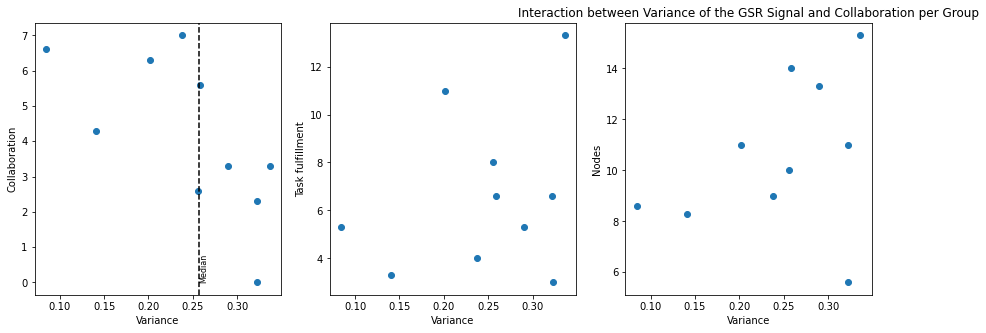

In [10]:
reg.fit(X, y)

# Create scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X, y['Collaboration'])
axs[1].scatter(X, y['Task_fulfillment'])
axs[2].scatter(X, y['Nodes'])

# labels
axs[0].set_xlabel('Variance')
axs[0].set_ylabel('Collaboration')
axs[1].set_xlabel('Variance')
axs[1].set_ylabel('Task fulfillment')
axs[2].set_xlabel('Variance')
axs[2].set_ylabel('Nodes')


#add vertical line for median GSR variance
axs[0].axvline(x=0.2571505, ymin=0, ymax=1, color='black', linestyle='--')
axs[0].text(0.2571505, 0, 'Median', rotation=90, fontsize=8, color='black', ha='left', va='bottom')

plt.title('Interaction between Variance of the GSR Signal and Collaboration per Group')
plt.show()

#collaboration = array([2.775, 3.8  , 6.125])
#std = array([0.4585045, 0.507099 , 0.560327 ])
#variance = array([0.2105035 , 0.2571505 , 0.31412675])

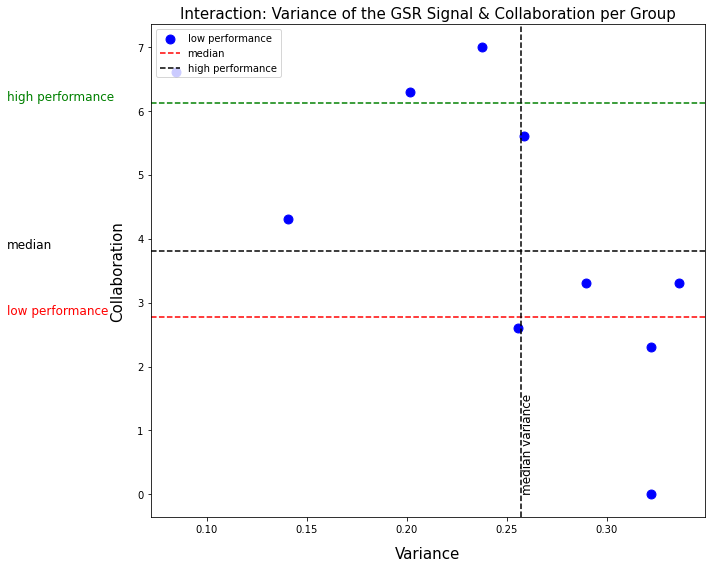

<Figure size 5400x3600 with 0 Axes>

In [11]:
reg.fit(X, y)

# Create scatter plot for collaboration vs variance
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(X, y['Collaboration'], c='blue', s=80)
ax.grid(visible=False)

# labels
ax.set_xlabel('Variance', fontsize=15, labelpad=12)
ax.set_ylabel('Collaboration', fontsize=15, labelpad=12)

# Add horizontal lines and labels for "low", "medium", and "high"
ax.axhline(y=2.775, xmin=0, xmax=1, color='red', linestyle='--')
ax.text(0, 2.775, 'low performance', fontsize=12, color='red', ha='left', va='bottom')
ax.axhline(y=3.8, xmin=0, xmax=1, color='black', linestyle='--')
ax.text(0, 3.8, 'median', fontsize=12, color='black', ha='left', va='bottom')
ax.axhline(y=6.125, xmin=0, xmax=1, color='green', linestyle='--')
ax.text(0, 6.125, 'high performance', fontsize=12, color='green', ha='left', va='bottom')

#add vertical line for median GSR variance
ax.axvline(x=0.2571505, ymin=0, ymax=1, color='black', linestyle='--')
ax.text(0.2571505, 0, 'median variance', rotation=90, fontsize=12, color='black', ha='left', va='bottom')

ax.legend(['low performance', 'median', 'high performance'], loc='upper left')

plt.title('Interaction: Variance of the GSR Signal & Collaboration per Group', fontsize=15)
plt.grid(linestyle='--', color='lightgray')
plt.grid(visible=False)
plt.tight_layout()
plt.figure(dpi=900)
plt.show()

In [12]:
# Assign the independent and dependent variables
X = data[['Standard_Deviation']]
y = data[['Collaboration','Task_fulfillment','Nodes']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

[[-12.59505546]
 [ 15.129905  ]
 [ 14.5563718 ]]
[10.65322519 -0.77431234  3.51328291]
0.1284523655665253
-1.0419382125375858


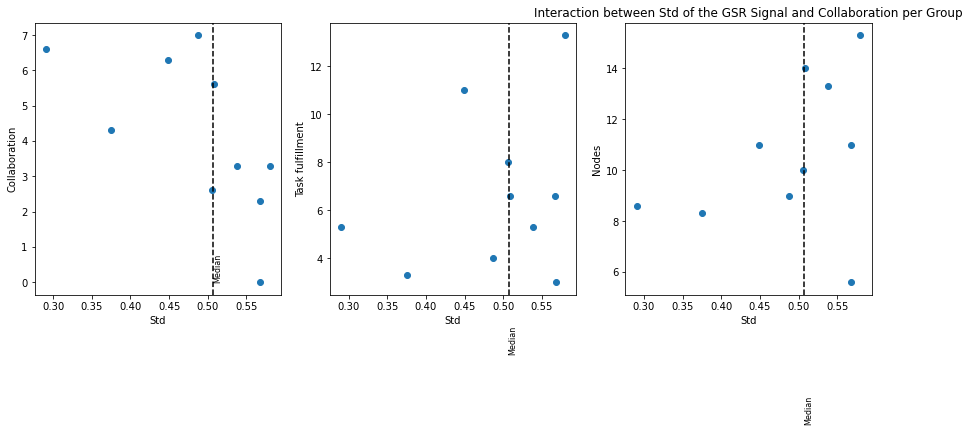

In [13]:
reg.fit(X, y)

# Create scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X, y['Collaboration'])
axs[1].scatter(X, y['Task_fulfillment'])
axs[2].scatter(X, y['Nodes'])

# labels
axs[0].set_xlabel('Std')
axs[0].set_ylabel('Collaboration')
axs[1].set_xlabel('Std')
axs[1].set_ylabel('Task fulfillment')
axs[2].set_xlabel('Std')
axs[2].set_ylabel('Nodes')


#add vertical line for median GSR variance
axs[0].axvline(x=0.507099, ymin=0, ymax=1, color='black', linestyle='--')
axs[0].text(0.507099, 0, 'Median', rotation=90, fontsize=8, color='black', ha='left', va='bottom')
axs[1].axvline(x=0.507099, ymin=0, ymax=1, color='black', linestyle='--')
axs[1].text(0.507099, 0, 'Median', rotation=90, fontsize=8, color='black', ha='left', va='bottom')
axs[2].axvline(x=0.507099, ymin=0, ymax=1, color='black', linestyle='--')
axs[2].text(0.507099, 0, 'Median', rotation=90, fontsize=8, color='black', ha='left', va='bottom')

plt.title('Interaction between Std of the GSR Signal and Collaboration per Group')
plt.show()

#collaboration = array([2.775, 3.8  , 6.125])
#std = array([0.4585045, 0.507099 , 0.560327 ])
#variance = array([0.2105035 , 0.2571505 , 0.31412675])

In [714]:
#plt.savefig("scatter_collaboration_variance.png", dpi=900)

<Figure size 432x288 with 0 Axes>

In [18]:
#percentile of collaboration rating
x = np.percentile([0.070, 0.066, 0.063, 0.056, 0.043, 0.033,  0.033,  0.026, 0.023, 0.00 ], [25, 50, 75])
x*100

array([2.775, 3.8  , 6.125])

In [32]:
#regression coefficient: -1 = strong negative correlation, 0 = no correlation, 1 = strong positive correlation
x = data['Standard_Deviation']
y = data['Task_fulfillment']
corr, p_value = pearsonr(x, y)
print("Correlation coefficient: ",corr)
print("p-value: ",p_value)

Correlation coefficient:  0.2680755677928812
p-value:  0.45394110829200696


In [33]:
x = data['Standard_Deviation']
y = data['Collaboration']
corr, p_value = pearsonr(x, y)
print("Correlation coefficient: ",corr)
print("p-value: ",p_value)

Correlation coefficient:  -0.6306088855721127
p-value:  0.05061320711647442


In [34]:
x = data['Variance']
y = data['Collaboration']
corr, p_value = pearsonr(x, y)
print("Correlation coefficient: ",corr)
print("p-value: ",p_value)

Correlation coefficient:  -0.6604095386743615
p-value:  0.037665391852274126


Old Correlation coefficient:  -0.4528722339439188
p-value:  0.22090622531114976

In [35]:
x = data['Standard_Deviation']
y = data['Nodes']
corr, p_value = pearsonr(x, y)
print("Correlation coefficient: ",corr)
print("p-value: ",p_value)

Correlation coefficient:  0.3644912324673306
p-value:  0.300426428098702


Old Correlation coefficient:  -0.6883438642108192
p-value:  0.04035853448651482


In all three graphics, the groups with either very high variance (>0.7) and very low variance (<0.2) performed the worst. The best performances were achieved in the groups with a variance between >0.2 and <0.5.

# Individual: Variance x Task fulfillment, x Collaboration, x Nodes in Linear Regression

In [806]:
#load data from CSV files
individual_data = pd.read_csv('indi_fullresults.csv',sep=';')

In [812]:
#individual_data = individual_data.drop([24,25,26])
#individual_data.info()

In [808]:
#Not normally distributed in individual variance
stats.shapiro(individual_data['Variance'])

ShapiroResult(statistic=0.9248518943786621, pvalue=0.035902660340070724)

In [813]:
# Assign the independent and dependent variables
X = individual_data[['Standard_Deviation']]
y = individual_data[['Collaboration','Task_fulfillment','Nodes']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)

# Predict the test data
y_pred = reg.predict(X_test)

# print the summary
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

[[ 2020.78748005]
 [22326.54083173]
 [ 9247.41926411]]
[ -2016.93700644 -22321.59864567  -9237.58522364]
0.03905904743364452
-1.076886642087988


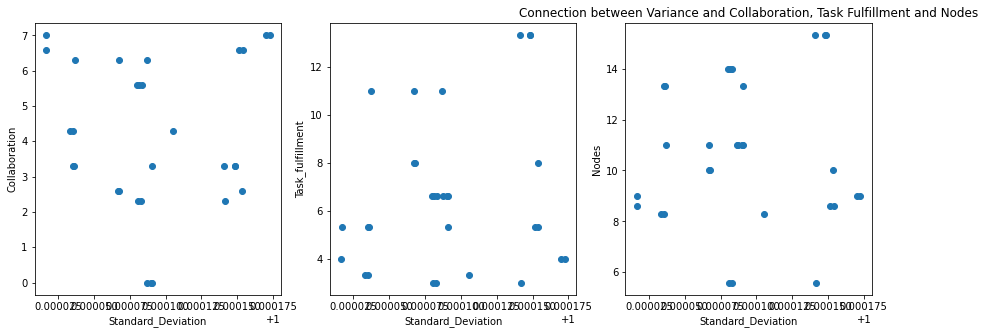

In [814]:
reg.fit(X, y)

# scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X, y['Collaboration'])
axs[1].scatter(X, y['Task_fulfillment'])
axs[2].scatter(X, y['Nodes'])

axs[0].set_xlabel('Standard_Deviation')
axs[0].set_ylabel('Collaboration')
axs[1].set_xlabel('Standard_Deviation')
axs[1].set_ylabel('Task_fulfillment')
axs[2].set_xlabel('Standard_Deviation')
axs[2].set_ylabel('Nodes')

plt.title('Connection between Variance and Collaboration, Task Fulfillment and Nodes')
plt.show()

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [815]:
#variance x nodes
x = individual_data['Standard_Deviation']
y = individual_data['Nodes']
corr, p_value = pearsonr(x, y)
print("Correlation coefficient: ",corr)
print("p-value: ",p_value)

Correlation coefficient:  0.041633490334306716
p-value:  0.8270856107387475


In [846]:
#variance x collaboration
x = individual_data['Variance']
y = individual_data['Collaboration']
corr, p_value = pearsonr(x, y)
print("Correlation coefficient: ",corr)
print("p-value: ",p_value)

Correlation coefficient:  0.007864795624685353
p-value:  0.9670986805331833


In [817]:
#positive linear correlation between variance x task fulfillment
x = individual_data['Standard_Deviation']
y = individual_data['Task_fulfillment']
corr, p_value = pearsonr(x, y)
print("Correlation coefficient: ",corr)
print("p-value: ",p_value)

Correlation coefficient:  0.18770576001039377
p-value:  0.3205705019790431


On an individual level, the data is scattered in all three categories. there is no visible trend detectable, However, due to the extremely individual nature of GSR (there is no “normal” baselines for people) makes it virtually impossible to directly compare GSR measurements across individuals (Bersak, McDarby, Augenblick, McDarby, McDonnell, McDonal and Karkun, 2001). 

# Visualize Dependent x Independet variables

In [522]:
import plotly.express as px
import plotly.graph_objects as go

In [818]:
cols = ['Variance', 'Collaboration','Task_fulfillment', 'Nodes', 'ID']

fig = px.parallel_coordinates(individual_data, color="Group", dimensions=cols,
                              title="Variance Coordinates Plot")
#fig.show()

In [479]:
cols = ['Variance','Collaboration','Nodes','Task_fulfillment']

fig = px.parallel_coordinates(data, color="Group", dimensions=cols,
                              title="Variance Coordinates Plot")
fig.show()

# Rating of the Performance

In [587]:
#load data from CSV files
gsr_data2 = pd.read_csv('variance_and_performance.csv')
performance_data2 = pd.read_excel('efficiency.xlsx')

In [590]:
#merge the two data sets on a common Group column
data2 = gsr_data.merge(performance_data2, how='outer',on = 'Group')
data2 = data2.drop([8])
#values = {"Collaboration": 0.00, "Task fulfillment": 6.50, "Nodes": 11.00}
#data2 = data2.fillna(value=values)
#data.drop(data.tail(1).index,inplace=True)
#data2

In [589]:
data2 = data.sort_values('Collaboration', ascending = False)
data2

,Group,Variance,Mean,Standard_Deviation,Collaboration,Task_fulfillment,Nodes,total_performance
10,11.0,0.237499,0.232470,0.487339,7.0,4.0,9.0,6.67
9,10.0,0.084315,0.657878,0.290370,6.6,5.3,8.6,"6,83"
5,6.0,0.201505,0.317646,0.448893,6.3,11.0,11.0,9.43
4,5.0,0.258458,-0.086729,0.508388,5.6,6.6,14.0,8.73
6,7.0,0.140642,0.494338,0.375022,4.3,3.3,8.3,5.30
2,3.0,0.336371,-0.001206,0.579975,3.3,13.3,15.3,10.63
7,8.0,0.289823,0.229220,0.538352,3.3,5.3,13.3,7.3
0,1.0,0.255843,-0.301450,0.505810,2.6,8.0,10.0,6.92
1,2.0,0.322374,0.386465,0.567780,2.3,3.0,5.6,3.60
3,4.0,0.322228,0.025738,0.567652,0.0,6.6,11.0,5.83


calculating the quartile to benchmark overall good results in all three categories(collaboration, task fulfillment, nodes) vs bad results: everything below 5.2 is a bad result (lowest quartile), everyting from 5.2 to 5.83 is a medium bad result, everything between 5.83 to 8.73 is a medium good result and everyting from 8.73 upwards is a good result

5.83 is the median for total performance

3 is the median for collaboration

In [543]:
#percentile of collaboration rating
x = np.percentile([0.070, 0.066, 0.063, 0.056, 0.043, 0.033,  0.033,  0.026, 0.023, 0.00 ], [25, 50, 75])
x*100

array([2.775, 3.8  , 6.125])

In [591]:
#percentile of the variance rating
y = np.percentile([0.237499, 0.084315, 0.201505, 0.258458, 0.140642, 0.336371,  0.289823,  0.255843, 0.322374, 0.322228], [25, 50, 75])
y

array([0.2105035 , 0.2571505 , 0.31412675])

In [592]:
#percentile of the std
y = np.percentile([0.487339, 0.290370, 0.448893, 0.508388, 0.375022, 0.579975,  0.538352,  0.505810, 0.567780, 0.567652], [25, 50, 75])
y

array([0.4585045, 0.507099 , 0.560327 ])

In [671]:
collab_rating = ['2.0','1.0','1.0','3.0','4.0','1.0','3.0','2.0','4.0']
data2['collab rating'] = collab_rating

total_rating = ['1.0','1.0','1.0','2.0','2.0','3.0','3.0','4.0','4.0']
data2['total rating'] = total_rating

data2

,GROUP,variance,Collaboration,Task_fulfillment,Nodes,total_performance,collab rating,total rating
3,4.0,0.336371,3.30,13.30,15.30,10.63,2.0,1.0
6,7.0,0.201505,6.30,11.00,11.00,9.43,1.0,1.0
5,6.0,0.258458,5.60,6.60,14.00,8.73,1.0,1.0
0,1.0,0.499816,2.75,8.00,10.00,6.92,3.0,2.0
4,5.0,0.322228,0.00,6.50,11.00,5.83,4.0,2.0
7,8.0,0.140642,4.30,3.30,8.30,5.30,1.0,3.0
8,9.0,0.289823,2.30,0.00,13.30,5.20,3.0,3.0
1,2.0,0.754599,3.75,1.75,5.75,3.75,2.0,4.0
2,3.0,1.000284,1.00,4.00,5.50,3.50,4.0,4.0


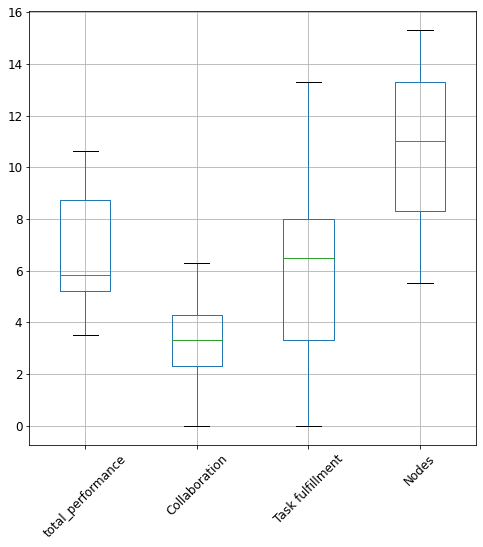

In [279]:
#boxplot = data2.boxplot(column = ['total_performance','Collaboration', 'Task fulfillment', 'Nodes'])
boxplot = data2.boxplot(column = ['total_performance','Collaboration', 'Task fulfillment', 'Nodes'],grid=True, figsize=(8,8), rot=45, fontsize=12) 

# linear regression analysis on group level: Ordinary Least Squares(OLS)

In [820]:
# Assign the independent and dependent variables
X = data[['Variance']]
y = data[['Nodes']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)

# Predict the test data
y_pred = reg.predict(X_test)

# Fit the model using the statsmodel library
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the model
#print(results.summary())

In [821]:
# Assign the independent and dependent variables
X = data[['Variance']]
y = data[['Task_fulfillment']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)

# Predict the test data
y_pred = reg.predict(X_test)

# Fit the model using the statsmodel library
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the model
#print(results.summary())

In [822]:
# Assign the independent and dependent variables
X = data[['Variance']]
y = data[['Collaboration']]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)

# Predict the test data
y_pred = reg.predict(X_test)

# Fit the model using the statsmodel library
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the model
#print(results.summary())

# linear regression analysis on individual level: Ordinary Least Squares(OLS)

In [824]:
# Assign the independent and dependent variables
X = individual_data[['Variance']]
y = individual_data['Task_fulfillment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)

# Predict the test data
y_pred = reg.predict(X_test)

# Fit the model using the statsmodel library
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the model
#print(results.summary())

In [827]:
# Assign the independent and dependent variables
X = individual_data[['Variance']]
y = individual_data['Collaboration']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)

# Predict the test data
y_pred = reg.predict(X_test)

# Fit the model using the statsmodel library
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the model
#print(results.summary())

In [828]:
# Assign the independent and dependent variables
X = individual_data[['Variance']]
y = individual_data['Collaboration']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Initialize the model
reg = LinearRegression()

# Fit the model to the train data
reg.fit(X_train, y_train)

# Predict the test data
y_pred = reg.predict(X_test)

# Fit the model using the statsmodel library
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the model
#print(results.summary())

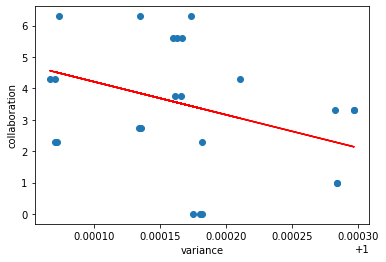

In [1007]:
# Create a scatter plot
plt.scatter(individual_data['variance'], individual_data['collaboration'])

# Add the line of best fit
plt.plot(individual_data['variance'], reg.predict(individual_data[['variance']]), color='red')

# Add labels to the axes
plt.xlabel('variance')
plt.ylabel('collaboration')

# Show the plot
plt.show()

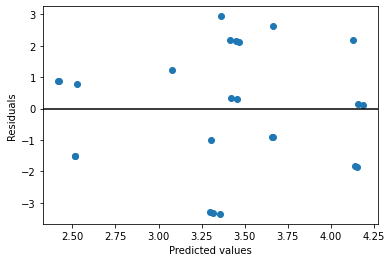

In [681]:
# Calculate the residuals using the same data that was used to fit the model
residuals = individual_data['collaboration'] - reg.predict(individual_data[['variance']])

# Create a scatter plot of the residuals
plt.scatter(reg.predict(individual_data[['variance']]), residuals)

# Add a line for zero residuals
plt.axhline(y=0, color='black', linestyle='-')

# Add labels to the axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

# checking assumptions for regression models: Group level

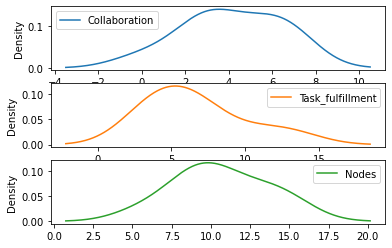

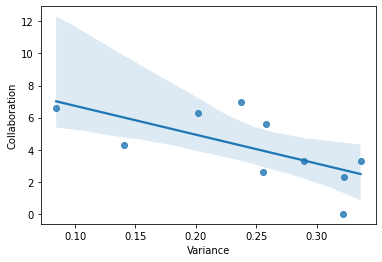

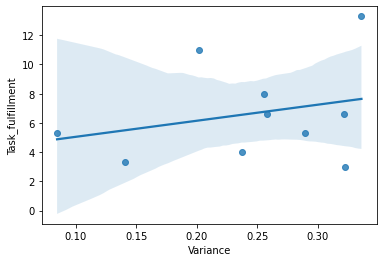

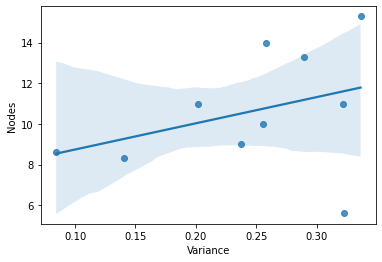

In [829]:
# check for normality
# histograms and Q-Q plots
data[['Collaboration', 'Task_fulfillment', 'Nodes']].plot(kind='density', subplots=True, layout=(3,1), sharex=False)
plt.show()

# check for linearity
sns.regplot(x='Variance', y='Collaboration', data=data)
plt.show()
sns.regplot(x='Variance', y='Task_fulfillment', data=data)
plt.show()
sns.regplot(x='Variance', y='Nodes', data=data)
plt.show()

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



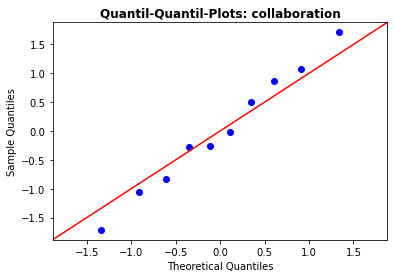

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



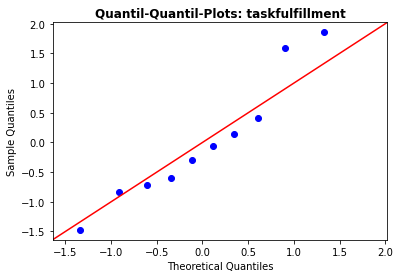

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



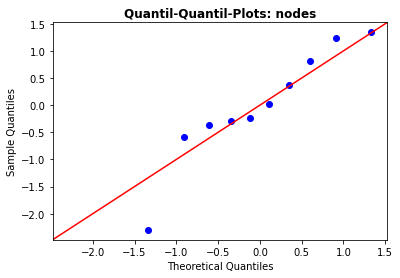

In [830]:
x = data[['Variance']] # independent variable
y = data[['Collaboration', 'Task_fulfillment', 'Nodes']] # dependent variables
x = sm.add_constant(x) # add constant for the model

# fit the model for collaboration
results_collaboration = sm.OLS(y['Collaboration'], x).fit()
# fit for taskfulfillment
results_taskfulfillment = sm.OLS(y['Task_fulfillment'], x).fit()
# fit for nodes
results_nodes = sm.OLS(y['Nodes'], x).fit()

# check for normality for collaboration
fig = sm.graphics.qqplot(results_collaboration.resid, dist=stats.norm, line='45', fit=True)
plt.title("Quantil-Quantil-Plots: collaboration", fontsize=12, fontweight='bold')
plt.show()

# check for normality for taskfulfillment
fig = sm.graphics.qqplot(results_taskfulfillment.resid, dist=stats.norm, line='45', fit=True)
plt.title("Quantil-Quantil-Plots: taskfulfillment", fontsize=12, fontweight='bold')
plt.show()

# check for normality for nodes
fig = sm.graphics.qqplot(results_nodes.resid, dist=stats.norm, line='45', fit=True)
plt.title("Quantil-Quantil-Plots: nodes", fontsize=12, fontweight='bold')
plt.show()

In [1009]:
#print(results_collaboration.summary())
#print(results_taskfulfillment.summary())
#print(results_nodes.summary())

# checking assumptions for regression models: individual level

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



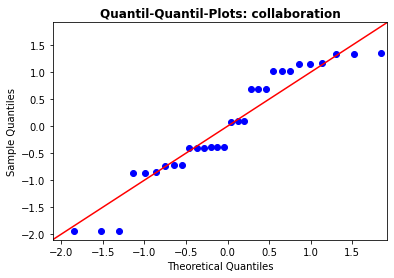

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



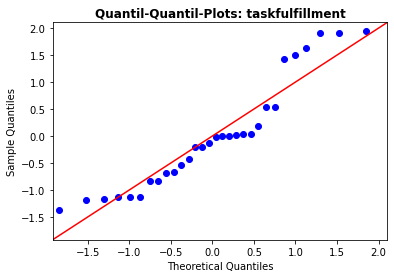

/Users/dianakozachek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



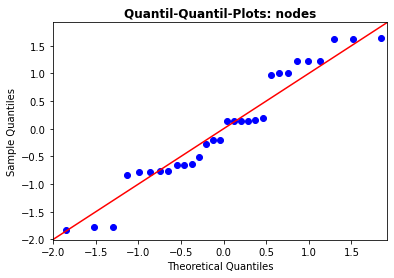

In [831]:
x = individual_data[['Variance']] # independent variable
y = individual_data[['Collaboration', 'Task_fulfillment', 'Nodes']] # dependent variables
x = sm.add_constant(x) # add constant for the model

# fit the model for collaboration
results_collaboration = sm.OLS(y['Collaboration'], x).fit()
# fit for taskfulfillment
results_taskfulfillment = sm.OLS(y['Task_fulfillment'], x).fit()
# fit for nodes
results_nodes = sm.OLS(y['Nodes'], x).fit()

# check for normality for collaboration
fig = sm.graphics.qqplot(results_collaboration.resid, dist=stats.norm, line='45', fit=True)
plt.title("Quantil-Quantil-Plots: collaboration", fontsize=12, fontweight='bold')
plt.show()

# check for normality for taskfulfillment
fig = sm.graphics.qqplot(results_taskfulfillment.resid, dist=stats.norm, line='45', fit=True)
plt.title("Quantil-Quantil-Plots: taskfulfillment", fontsize=12, fontweight='bold')
plt.show()

# check for normality for nodes
fig = sm.graphics.qqplot(results_nodes.resid, dist=stats.norm, line='45', fit=True)
plt.title("Quantil-Quantil-Plots: nodes", fontsize=12, fontweight='bold')
plt.show()

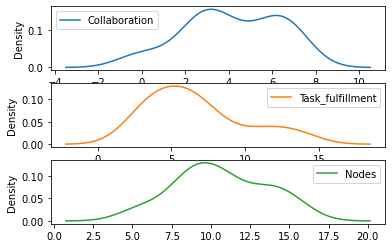

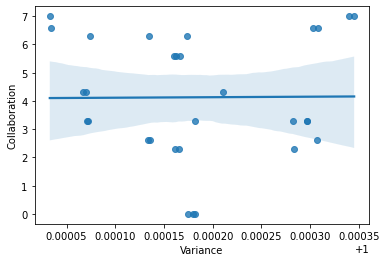

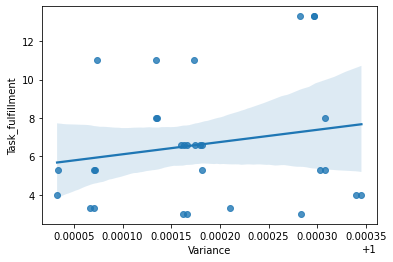

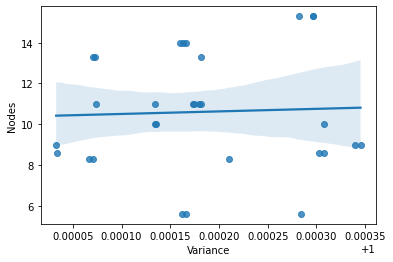

In [568]:
# check for normality and Q-Q plots
individual_data[['Collaboration', 'Task_fulfillment', 'Nodes']].plot(kind='density', subplots=True, layout=(3,1), sharex=False)
plt.show()

# check for linearity
sns.regplot(x='Variance', y='Collaboration', data=individual_data)
plt.show()
sns.regplot(x='Variance', y='Task_fulfillment', data=individual_data)
plt.show()
sns.regplot(x='Variance', y='Nodes', data=individual_data)
plt.show()

In [1010]:
#print(results_collaboration.summary())
#print(results_taskfulfillment.summary())
#print(results_nodes.summary())

# Significance Testing

In [121]:
data = pd.read_csv('variance_and_performance.csv')
#data

In [114]:
from scipy.stats import shapiro

In [115]:
#check if data normally distributed (will determine whether t-test or wilcoxon test for significance)
stat, p = shapiro(data['Standard_Deviation'])

if p > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not look normally distributed')

print(f"Shapiro-Wilk test: stat = {stat:.4f}, p-value = {p:.4f}")

Data is normally distributed
Shapiro-Wilk test: stat = 0.8697, p-value = 0.0768


The t-statistic measures the difference between the means of the two groups relative to the variability within the groups, the p-value tells you the probability of observing such a difference if there were no real difference between the groups.

In [116]:
variance_data = data['Variance'].values

# Perform one-sample t-test with null hypothesis that mean = 0
t_statistic, p_value = stats.ttest_1samp(variance_data, 0)

print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

t-statistic: 10.4065, p-value: 0.0000


In [117]:
mean_data = data['Mean'].values

# Perform one-sample t-test with null hypothesis that mean = 0
t_statistic, p_value = stats.ttest_1samp(mean_data, 0)

print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

t-statistic: 2.0897, p-value: 0.0632


In [118]:
std_data = data['Standard_Deviation'].values

# Perform one-sample t-test with null hypothesis that mean = 0
t_statistic, p_value = stats.ttest_1samp(std_data, 0)

print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

t-statistic: 18.3402, p-value: 0.0000


In [119]:
collab_data = data['Collaboration'].values

# Perform one-sample t-test with null hypothesis that mean = 0
t_statistic, p_value = stats.ttest_1samp(collab_data, 0)

print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

t-statistic: 6.0467, p-value: 0.0001


In [120]:
node_data = data['Nodes'].values

# Perform one-sample t-test with null hypothesis that mean = 0
t_statistic, p_value = stats.ttest_1samp(node_data, 0)

print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

t-statistic: 8.9952, p-value: 0.0000


# Export

In [181]:
#results_df.to_csv('mixed_effects_regression_results.csv', index=True)